<a href="https://colab.research.google.com/github/ShayanRiyaz/DigitalHistory/blob/Shayan/Week8-Statistical-Visualization-using-Seaborn-and-Pandas/Statistical-Visualization-using-Seaborn-and-Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Visualization using Seaborn and Pandas

## Table of Contents

- Why, Where and How we use Seaborn
- What will we be learning today
    - Goals
- Getting started with the dataset
    - **1.0 - Now Try This**
- Univariate Plots
    - Histogram
    - Kerner Density Estimation (KDE)
    - Distribution plots
    - **2.0 - Now Try This**
- Bivariate Plots
    - Scatter plots
    - **3.0 - Now Try This**
    - Line plots
    - Joint plots
    - **4.0 - Now Try This**
- Categorical Data Types
    - Scatter plots
    - **5.0 - Now Try This**
    - Box plots
    - **6.0 - Now Try This**
    - Violin plots
- Tutorial

## What is Seaborn
Seaborn is a library built on top of matlplotlib. We use seaborn when our data requires aggregation or summarization before making a plot.Here are some important points about seaborn we should look into before diving into the tools.

## Why should we use Seaborn
The python seaborn library makes data visualization easier when we need to find useful information in our data through statistical analysis. With Seaborn we can create these graphs and visualize statistical data along with helpful functions such as:

- The library allows us to compare multiple variables with each other. 
- Seaborn lets us plot multiple graphs.
- The library is rich in colors and further help us in visualizing useful patterns.
- It easily integrates with Pandas DataFrames.

## How should we use Seaborn

## About the Dataset 

### Tips
Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule. 

### Recent Grads
The recent grads dataset contains basic earnings and labor force information in a more detailed breakdown, including by sex and by the type of job they got. The maximum age of participants in this dataset is 28.

Headers for `recent-grads.csv` are shown below:

Header | Description
---|---------
`Rank` | Rank by median earnings
`Major_code` | Major code, FO1DP in ACS PUMS
`Major` | Major description
`Major_category` | Category of major from Carnevale et al
`Total` | Total number of people with major
`Sample_size` | Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
`Men` | Male graduates
`Women` | Female graduates
`ShareWomen` | Women as share of total
`Employed` | Number employed (ESR == 1 or 2)
`Full_time` | Employed 35 hours or more
`Part_time` | Employed less than 35 hours
`Full_time_year_round` | Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
`Unemployed` | Number unemployed (ESR == 3)
`Unemployment_rate` | Unemployed / (Unemployed + Employed)
`Median` | Median earnings of full-time, year-round workers
`P25th` | 25th percentile of earnigns
`P75th` | 75th percentile of earnings
`College_jobs` | Number with job requiring a college degree
`Non_college_jobs` | Number with job not requiring a college degree
`Low_wage_jobs` | Number in low-wage service jobs




## What will we be learning today

### Goals
- Understanding and visualizing the 'tips' dataset.
- We will use visualization as an analysis tool instead of using Pandas DataFrame 
- Check if the tips recieved by a waiter are dependent on the other factors such as
    - Sex
    - day
    - time
    - size of group
    - smokers or non-smokers
- We will use the learning the following types of plots:
    - Univariate plots
        - Histogram
        - Kerner Density Estimation (KDE)
        - Distplot
    - Bivariate plots
        - Scatterplot
        - Lineplot
        - Jointplot (*Basic, Hex, KDE*)
    - Categorical Datatypes
        - Scatterplot.
        - Boxplot.
        - Violin plot.
- Use Seaborn to make beautiful visualizations and tell a story.

This might seem very overwhelming with so many graphs, but don't worry, this module will teach you the basics, but also the shortcuts.

**But First**, lets install seaborn

```pip install seaborn```

**Done?**, lets proceed.

As usual, we will first upload the relevant libaries

In [ ]:
import seaborn as sns
import pandas as pd

Uploading built in datasets is very similar to reading ```.csv```  we would traditionally do in pandas as both are loaded as a Dataframe using pandas..
- We define the data frame as ```tips``` and run the following command : ```sns.load_dataset('tips')```, here ```sns``` is us calling the seaborn library, ```.load_dataset()``` is calling the ```load_dataset``` function and ```('tips')``` is the dataset we are calling.

In [ ]:
tips = sns.load_dataset('tips')

Next following the immediate steps we will observe our data frame in order to know the following:
- The columns in our frame.
- The types of values (categorical and numerical)

### 1.0 - Now Try This:
Looking at the result of ```tips.head()``` below what can we distinguish?


In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Answer**: 
- ```total_bill``` : numerical
- ```tip```: numerical
- ```sex```: categorical
- ```smoker```: categorical [*this can also be numerical,(**how?**)*]
- ```day```: categorical
- ```time```: categorical
- ```size```: numerical

Instead of observing manually we can simply run the command ```tips.dtypes```:

In [ ]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

And there we have it, 4 categorical columns, 3 numerical (2 float64, 1 int64)

As you have probaly learned by now, mapping categorical data is one of the main feature provided by *Seaborn* and this is exactly what we will be doing in the next steps.

Now lets retrieve some common information such as min, max, unique and count for given numerical data.

In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Lets go through all the important plots of Seaborn step by step.

# Univariate Plots

Univariate plots are based on a variable for e.g 'total_bill', and show the frequency of values of a given variable.
There are two basic kinds of univarite plots:


### Histogram

A histogram is a kind of bar plot that gives a *discretized* display of value frequency. The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted. 

e.g:
We can make a histogram of tip percentages of the total bill using the plot.hist method on the Series

In [ ]:
tips['total_bill'].plot.hist(bins = 16,figsize = (20,10))

NameError: name 'tips' is not defined

### Kerner Density Estimation (KDE)

Similar to historgram, the *Kerner Density Plot* is a way to estimate the probability density function of a continous random variable. It is used when we need to know the distribution of the variable.

Using ```plot.kde``` and ```plot.density``` makes a density plot using the conventional mixture-of-normals estimate.

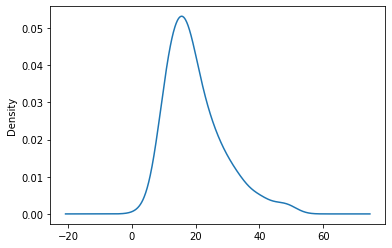

In [ ]:
tips['total_bill'].plot.density()

Although these are useful representations, there's a more efficient method that lets up combine both the Histogram and the KDE plot.

## Distplot

``` sns.distplot(data['variablename'])```

**sns.distplot()** combines the histogram plots (*something you came across in Week 4 with matplotlib*) and plots the estimated probability density function (*Week 7*) over the data. Here are some important things to note for this plot:
- **Histogram** :  Plots distribution of numerical data
- **Porbability Density Function** : Probabilities of a random variable for all its possible values. 
- **bin_size**: range of values

[1] **bin_size** is chosen automatically in seaborn.
let's move forward with the plot and analyze it further, we will plot ```'total_bill'```  which is a numerical column. 


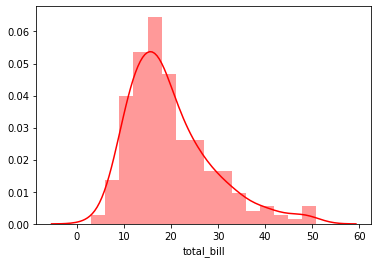

In [ ]:
sns.distplot(tips['total_bill'],bins = 16,color = 'red')

Lets look at the line of code above, there are three important components:
- **sns.displot** : This command intites the creation of the plot.
- **tips['total_bill]** : Gets the ```total_bill``` column from the tips dataframe.
- **Inference** : This is our observation from looking at the plot.

## 2.0 - Now Try This:
Can you highlight some important inferences that we can make by observing the plot?

**Note**: The method used above to pull columns ```tips['total_bill']``` is the most efficient way to pull column data.

**Answer** : Two important observations are:
- The ```total_bill``` variable looks skewed in nature (Density Plot)
- Most of the bills are between $10 - $20. (Histogram)

# Bivariate Plots

Bivariate plots are used when we need to:
- Find a relation between two variables.
- Find how the value of one variable changes the value of another variable.

These are also refered to as *Statistical Data Types*.

### Scatterplot

The default plot type of ```relplot``` is scatter plot. It shows us the relationship between two variables. Therefore, if we need to find the correlation between two variables scatterplot can be used.

Lets look at an example below

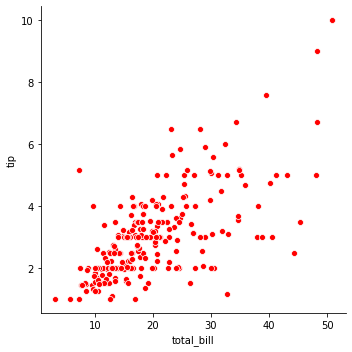

In [ ]:
sns.relplot(x="total_bill", y="tip", data=tips, color = 'red');

Notice, where most of the points lie. The conclusion is similar to what we found by observing the distplot but theres another addition:
- If the ```total_bill``` is between $10-$20, the tip is mostly above 2.

**Could there be a reason for that?**

### 3.0 - Now Try This:

Add another parameter to the ```relplot``` function, ```hue = smoker``` and plot it. 

**Does the resultant plot help us find any correlation?**


**Answer**:
```sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);```

### Lineplot

This plot is very similar to a scatter plot,however instead of points a line drawn connecting them with respect to the position on the x-axis. 


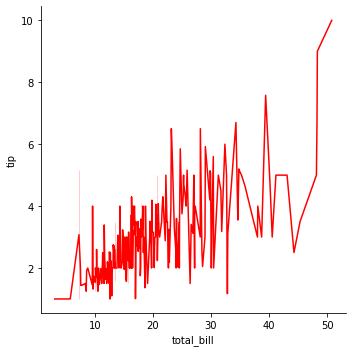

In [ ]:
sns.relplot(x = 'total_bill', y = 'tip',kind = 'line',data = tips,color = 'red')

Due to the random distribution of ```tip``` with respect to ```total_bills```. Therefore it is safe to say that the tip is not too dependent on the value of the ```total_bill```.

## Jointplot

The next important plot in the seaborn library is the ```sns.jointplot(x= , y= , data= )```

A joint-plot takes two variables and creates a histogram and scatterplot. Here are important points to note for this plot:
- **Histogram** : Plots distribution of numerical data
- **Scatterplot** : Help us with identifying a relation between the X-Y variables

Like the ```distplot``` we use histograms however instead of density plots we use scatter plots.

Lets move on to the plot and draw a simple joint plot using ```total_bill``` and ```tips```.

**Think**: 
Before we plot this graph, what can we possibly find?

**Answer**: The tip amount at any restaurant is dependent on the total_bill/bill_size. This plot can help us verify that.

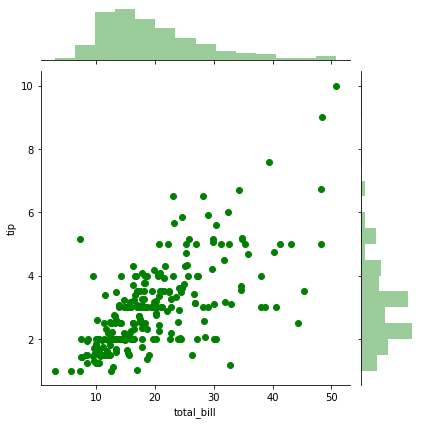

In [ ]:
sns.jointplot(x = "total_bill",
              y = "tip",
              data = tips,
              color = "green")

Looking at the line of code above, here are some important things to note:
- We defined an ```x``` variable as  ```'total_bill'``` instead of ```tips['total_bill']```.
- We do the same thing for the ```y``` as ```'tips'``` instead of ```tips['tip']```.
**Why?**
- Because the function allows to define ```data``` make it equal to the name of our dataframe, in our case ```tips```.

Observing the plot we can see that indeed the tip amount at any restaurant correlates with the total_bill. The histogram also lets us observe the distribution of both columns.

**Why is this information useful for us**. 
This shows us that there clusters of both variables, in specfic areas, that seem to show a trend.



### 4.0 - Now Try This:

Lets see what the percentage of tips are for every total bill value. For this exercise:
- Make a new varible```tip_pct```, this will be equal to the tip/(total_bill-tip).
- Convert the variable as an additional column to the ```tips``` dataframe.
- Plot the ```distplot``` and ```jointplot``` using ```tip_pct```.

**Hint**: for the joint plot you will set ```'total_bill'``` as the x-axis parameter.

#### Answers:

```tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])```

```sns.distplot(tips['tip_pct'],bins = 16,color = 'red')```

```sns.jointplot(x = 'total_bill',y = 'tip_pct',data = tips,color = 'green')```


**Observations**

# Categorical Data Types

### Scatterplot

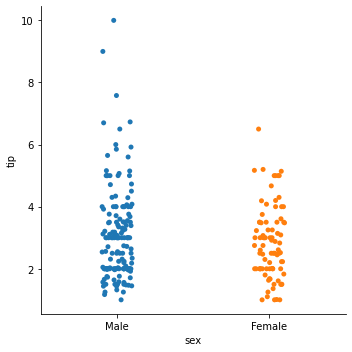

In [ ]:
sns.catplot(x='sex',y='tip',data = tips)

*Notice the fact that even though we plotted a scatter plot like the previous one, instead of ```relplot``` we used ```catplot```. Replot is for relationship numerical data while catplot is used to show the relationship between numerical and categorical data.*

We can see that most of the tips are clustered between 2 and 4, irrespective of the ```gender```.


### 5.0 - Now Try This:
You can plot different types of scatterplots by using the attribute kind and hue.
[catplot documentation](https://seaborn.pydata.org/generated/seaborn.catplot.html)

- Try:
- ```kind```= 'swarm'
- ```hue``` = 'sex'

**Answer**: 
```sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)```

## Boxplot

A box plot **also known as a box-and-whisker plot** shows the distribution of *quantitative* data in a way that we can draw compariions between variables or across levels of a categorical variable.


```
sns.boxplot(x=,y=,data=)
```
or
```
sns.catplot(x=,y=,kind='box',data=)
```

It shows a visual representation of five point summary statistics of a given data set. A five number summary includes:
- Minimum
- First Quartile
- Median (Second Quartile)
- Third Quartile
- Maximum

If you remeber, this is the same information we get when we run ```tips.describe()```. 

![box-plot.png](attachment:box-plot.png)

Before we make a boxplot there are some important points to note:
- boxplot is created for Categorical Continous Variables which means that if x-axis is categoricaland y-axis is continous (numberical)
- The case is the same of violin plots, which we will get into later.

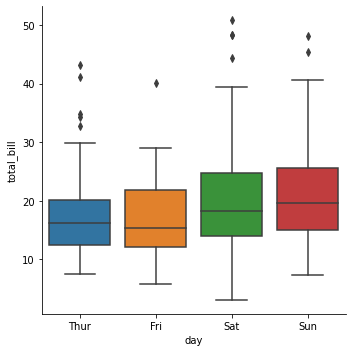

In [ ]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

Lets break the box-plot down piece-by-piece:
- The shaded box represents the values between the ```25th quartile``` and the ```75th quartile```.
- The horizontal line in the shaded box shows the ```median```.
- The two horizontal lines at the bottom and top respresent the ```minimum``` and ```maximum``` value respectively.
- The dots represent the ```outliers``` calculated based on the inter-quartile function.

One important use of this plots is that they help us compare values for different categories in a single graph. We can *infer* from the given graph that the amounf ot ```total bill``` is higher on the ```weekends than weekdays```.


### 6.0 - Now Try this
**How do we add antoher variable in the box plots**
Plot two separate plots
1. Add ```hue = 'sex'``` in the previous line of code.
2. Add ```hue = 'smoker'``` in the previous line of code.

**What can we observe?**

**Answer**:
 We can get so much information from a single graph. 
1. In this graph, we can see that the average amount of total_bill for females is always less than the males. So, we can say that total_bill amount is dependent on sex .
2. In this graph of Friday, its clearly seen that food bill is more in the case of non smoker when compared to smokers on that day.

## Violin Plots

Violin plots are used to visualize the distribution of the data and its probability density. This chart is a combination of a Box plot and a Density Plot. One of the main use cases for this plot is when we need to find the frequency of distribution along the box plot.

We can create violin plots by running:
```
sns.violinplot(x =, y = , data=)
```
or 
```
sns.catplot(x=, y=,kind="violin", data);
```


![violin-plot.png](attachment:violin-plot.png)

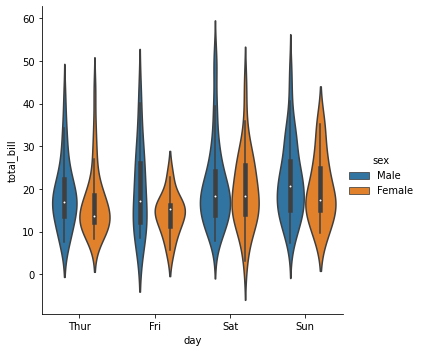

In [ ]:
sns.catplot(x="day", y="total_bill", kind="violin",hue = 'sex', data=tips);

To use the violin plot efficiently we added the parameter ```hue = 'sex'```, this helps us see that the ```total_bill``` for female is less than ```males```.



## Box vs Violin Plots

![box-violin.png](attachment:box-violin.png)

# Tutorial 

## Visual Storytelling with Seaborn

I found this amazing article online by Reilly Meinert.'Visual Storytelling with Seaborn'. The word storytelling is very important here, because it is a good way to learn data and understand statistical data. Data are records, and records are stories, so today we will be doing exactly that. We will learn how to tell a story by visualizating it.

The dataset for this tutorial is The Economic Guide to Picking a College Major, and article by [The Economic Guide to Picking a College Major](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/).

We will be visualizing and breaking down the role of men and women in the STEM majors along with the median salaries for those majors.

### Loading the Dataset

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
recent_grads = pd.read_csv('data/recent-grads.csv')

In [ ]:
recent_grads.dtypes

Rank                      int64
Major_code                int64
Major                    object
Total                   float64
Men                     float64
Women                   float64
Major_category           object
ShareWomen              float64
Sample_size               int64
Employed                  int64
Full_time                 int64
Part_time                 int64
Full_time_year_round      int64
Unemployed                int64
Unemployment_rate       float64
Median                    int64
P25th                     int64
P75th                     int64
College_jobs              int64
Non_college_jobs          int64
Low_wage_jobs             int64
dtype: object

## Plotting Numerical values
First lets construct a simple scatter plot and see the percentage of women in a major versus the median salary of the particular major

Text(0.5, 1.0, 'ShareWomen vs Median Salary')

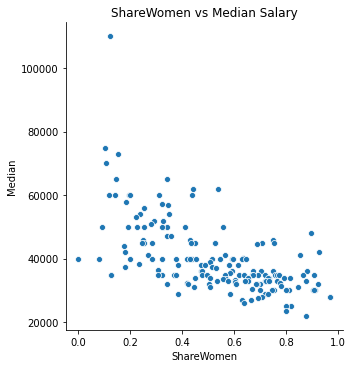

In [ ]:
sns.relplot(x='ShareWomen',y='Median',data = recent_grads)
plt.title('ShareWomen vs Median Salary')

**Notice** the fact that seaborn automatically added labels.

### Observation
We can see that there's trend that majors with higher percentage of woemn have lower median salaries. However, this data is not enough to make an assumption. 

Lets dive into it a bit more and add some important features

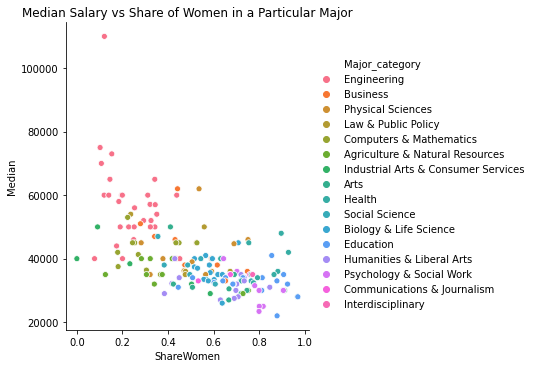

In [ ]:
# Try
sns.set_palette('Paired',10)

sns.relplot(x='ShareWomen',y = 'Median', hue = 'Major_category', data = recent_grads)

plt.title('Median Salary vs Share of Women in a Particular Major')
plt.show()

### See the difference in the code?

Before diving into the results lets see what we changed:
- [```sns.set_palette()```](https://seaborn.pydata.org/tutorial/color_palettes.html) sets the color palette to a different one when its run the next time.
- in ```sns.relplot``` we added another parameter ```hue = 'Major_category'```. This colors each point with its respective category.

### Observations

By observing this graph we can see that:
- Engineering majors end up with jobs that pay the highest median salary, however they also have the lowest percentage of women in engineering majors. 
- Law and Business majors dominate the high median income category after engineering.
- Education, health and psychology majors end up in job that have a lower median salary, however they have the highest percentage of women in those majors. 
- We can see that significantly higher percentage of women end up studying in fields that have lower median salaries than their male counterparts.

### Try: 
Change the style of the graph by adding ```style = 'Major_category'``` in the parameters of ```sns.relplot()```.

**What does it do?** <br>
[ANSWER]


So far we have used colors to represent a *categorical variable*,but what about continous variables, lke the total number of people in a major?



<function matplotlib.pyplot.show(*args, **kw)>

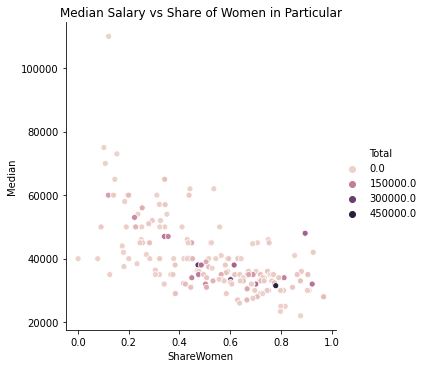

In [ ]:
sns.relplot(x = 'ShareWomen',y= 'Median',hue = 'Total',data = recent_grads)
plt.title('Median Salary vs Share of Women in Particular')
plt.show

**Notice anything different?**
Suddenly, the colors of the graph we initially used have changed. This is because the colors we used to represent different totals of people are not in the color pallete that we had set before ```sns.relplot('Paired',10)```. In order to change that we have to manually set the color mapping of the continous variable.

### Observations
This graph tells us alot of things:
- The majors with the highest median salaries are some of the least popular majors.
- This makes sense, because there is a higher demand for peopel in those fields, and due to low numbers available, employers want to pay people more for thei expertise.
- There are a few majors that are really popular. (Notice the dark points, these indicate that the women are in majority in the fields.)

We won't be able to do much with this information since we donot know about the category these fall into. Therefore we need to present this information in a way that the size of a point represents the number of people in the major

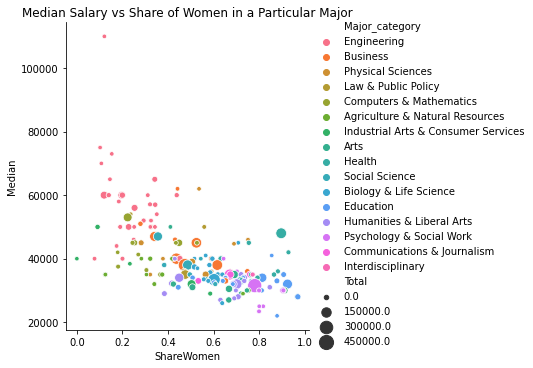

In [ ]:
#sns.set(rc={'figure.figsize':(40,20)})
sns.relplot(x='ShareWomen',y = 'Median',hue = 'Major_category',size = 'Total',
           sizes = (20,200), data = recent_grads)
plt.title('Median Salary vs Share of Women in a Particular Major')
plt.show()

### Observation 
Looking at this graph we can see that some of the most popular majors are:
- Psychology,Education, Biological and life Sciences, Business and Humanities.
- However, psychology, humanities and education have some of the lowest median salaries. Another point to not is that most of these points are 40-80 % are women, so there are also a large number of men in these categories who are making a lower median salary than their counterparts.

It's still necessary to note that this visualization still doesn't give us enough clarity, therefore we will try and plot a linegraph of this graph.

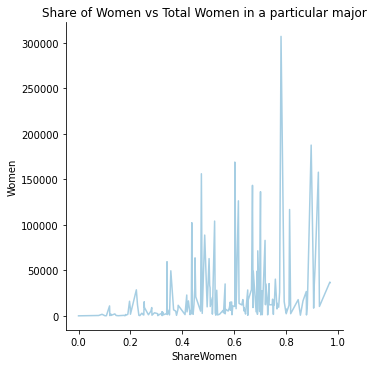

In [ ]:
sns.relplot(x='ShareWomen',y = 'Women',kind = 'line',data = recent_grads)
plt.title('Share of Women vs Total Women in a particular major')
plt.show()

**Note**: The main difference between creating a line and scatter plot is seaborn is the addition of the *kind* parameter, which is set to ```kind = 'line'```.

### Observation
The graph isn't the most helpful but we can see a few trends much clearer than the previous graph:
- There's 1 major that stands out more than the rest.


### Plotting Categorical Variables

In this dataset and similar ones we can see that we have an abundance of categorical variables. This gives us the opportunity to further investigate. This is where our playing with scatterplots geta a little more interesting. The scatter plots for categorical data are constructed differently from numberical data. For this we use the function ```catplot()``` instead of ```relplot()```

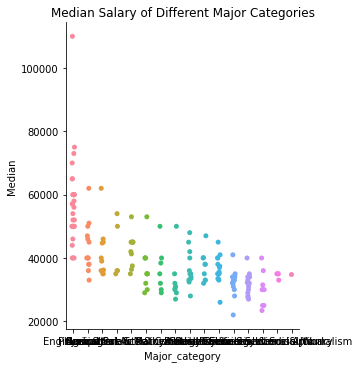

In [ ]:
#sns.set(rc={'figure.figsize':(40,20)})
sns.catplot(x = 'Major_category',y='Median',data = recent_grads)
plt.title('Median Salary of Different Major Categories')
plt.show()

**Wait** Why are the x-axis labels overlapping so much. Lets quickly fix that

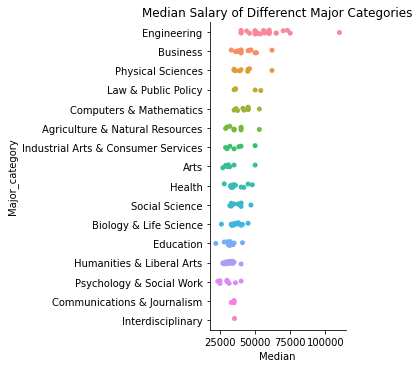

In [ ]:
sns.catplot(x='Median',y='Major_category',data = recent_grads)
plt.title('Median Salary of Differenct Major Categories')
plt.show()

### OR

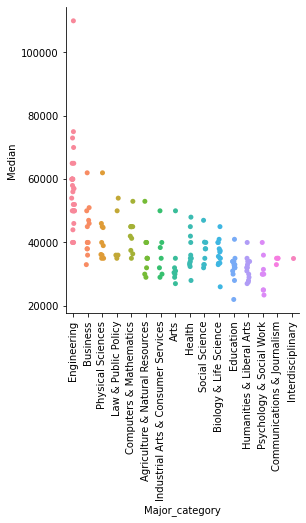

In [ ]:
sns.catplot(x='Major_category',y='Median',data = recent_grads)
plt.xticks(rotation = 90)
#plt.title('Median Salary of Differenct Major Categories')
plt.show()

Although the first option is much more readable than the second one, it is a standard practice to put categorical variables on the x-axis. In most cases the second option is the more appropriate fix for this problem. 

Next we will invesigate **Majors that have majority of women in addition to the median salaries for he majors in each category**, we will do this by passing one additional parameter in our scatter plot code


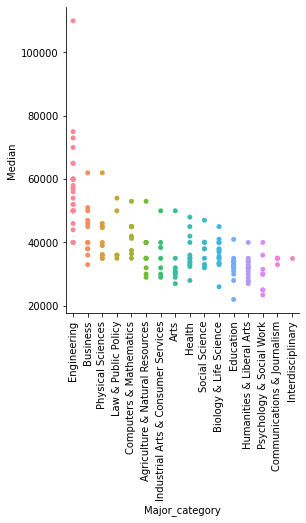

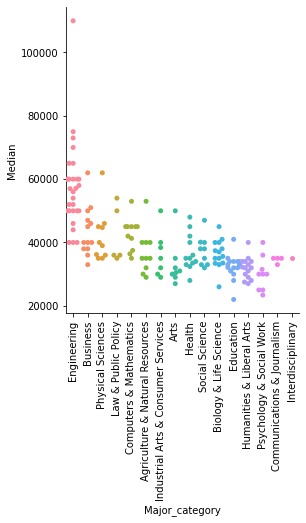

In [ ]:

sns.catplot(x = 'Major_category',
           y = 'Median',
           jitter = False,
           data = recent_grads
           )
plt.xticks(rotation = 90)
plt.show()

# Option 2
sns.catplot(x = 'Major_category', y = 'Median', kind = 'swarm', 
            data = recent_grads)
plt.xticks(rotation = 90)
plt.show()

In the first option we set ```jitter = False``` as a parameter, this shows all of the median salaries for each major in a single vertical line. This cleans the graph for us, **However**, points are overlapping which hides information.

The second option is setting ```kind = 'swarm'``` as a parameter, this also lines up the points vertically, However, it has points with the same median salary lined up horizontally within their respective categories. By looking at the second option we can see clearly that tehre are atleast 6 different engineering majors result in a median salary above $60,000, which were not visible in the previous graph.

**Note: our choice of how we want to represent our data relies heavily on the type of information we are trying to get across with visualizations.**


## Boxplot

To get a better understanding of the distributions of our data, we have several option. A simple method is the *boxplot*. 

**What are boxplots**
Boxplots show the quartiles and median of the aprt of our data we are interested in.

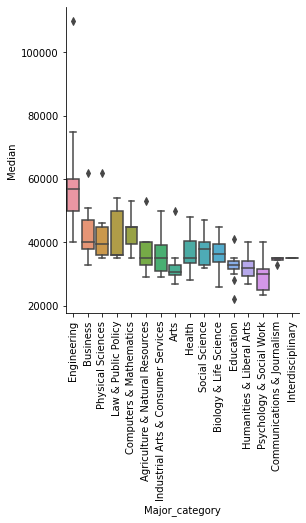

In [ ]:
sns.catplot(x='Major_category',
           y = 'Median',
           kind = 'box',
           data = recent_grads)
plt.xticks(rotation = 90)
plt.show()


## Homework

## Resources 
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Visual Storytelling with Seaborn](https://medium.com/swlh/visual-storytelling-with-seaborn-28dc548dbc4b)
- [Analyze the data through data visualization using Seaborn](https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e)
- [Data Visualization Using Seaborn](https://medium.com/@mukul.mschauhan/data-visualisation-using-seaborn-464b7c0e5122)

# Appendix

### Jointplot :: kind = 'hex'
Although we wera able to find our correlation in the ```jointplot``` we haven't been able to see where the highest density is. This is because every count is the same color. Lik

#### Variates



Over here, we will create a new column and name it 'tips_pct', which means the percentage of tips in the total bill for every event:

Therefore tip_pct = tip/(total_bill - tip)

In [ ]:
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])

In [ ]:
tips.head()

In [ ]:
sns.barplot(x = 'tip_pct',
            y = 'day',
            data = tips,
            orient='h')

Plotting functions in seaborn take a data argument, which can be a *pandas DataFrame*. The other argument refers to column names. Since there are multiple observations for each value in the day the bars are the average value of tip_pct.

The black lines drawn on the bars represent the *95% confidence interval* (optional configuration).

```seaborn.barplot``` has a hue option that enables us to split an additional categorical value.


In [ ]:
sns.barplot(x = 'tip_pct',
            y = 'day',
            hue = 'time',
            data = tips,
            orient = 'h')

**Note**: Seaborn has automatically changed the aesthetics of plots: the default color palette, plot background, and grid line colors. We can switch between different plot appearences using seaborn.set

In [ ]:
tips['tip_pct'].plot.kde()

**So why seaborn?**

Seaborn makes histograms and density plots even easier through its ```distplot``` method, this lets the plot be both a histogram and a continous density estimate simultaneously.

For example:

Consider a distribution consisting of draws from two different standard normal distribution.

In [ ]:
import numpy as np

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size = 200)
values = pd.Series(np.concatenate([comp1,comp2])) 
sns.distplot(values,bins = 100,color = 'k')

**Lets observe the Code above.**

We create two variables using Numpys-> Random-> Normal Library [**CONTINUE**]

In [ ]:
### Scatter or Point Plots

These are useful ways of examining the relationship between two 1D data series.

In [ ]:
## TO BE ADDED

## Facet Grids and Categorical Data

**Facet Grids**

When we are working with datasets, we will often come across grouping dimensions. One way to visualize this data using many categorical variables is to use a facet grid. Seaborn has a useful built-in function ```factorplot``` that simplifies making many kinds of faceted plots.

In [ ]:
sns.factorplot(x = 'day', y = 'tip_pct',hue='time',col = 'smoker',kind = 'bar',data= tips[tips.tip_pct<1])

Observing the above graphs, instead of grouping by 'time' by different bar colors within a facet, we can also expand the facet grid by adding one row per *time* value:

In [ ]:
sns.factorplot(x ='day',
              y = 'tip_pct',
              row = 'time',
              col = 'smoker',
              kind = 'bar',
              data = tips[tips.tip_pct < 1])